<a href="https://colab.research.google.com/github/kidabg548/quantum-computing-task/blob/main/quantum_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit-aer

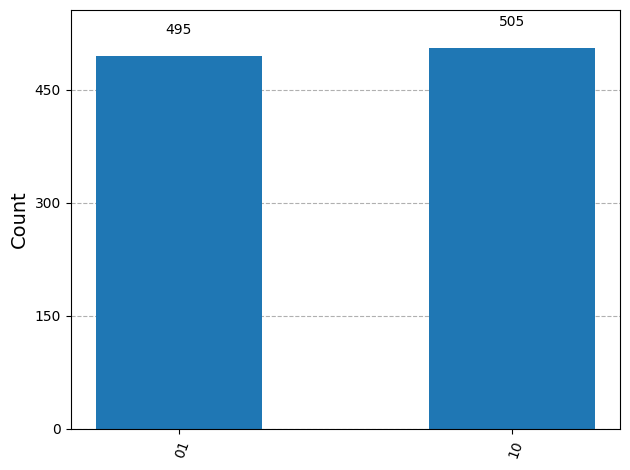

In [ ]:
import qiskit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator  # Import AerSimulator from qiskit_aer
from qiskit.quantum_info import Statevector


# Step 1: Create circuit with 2 qubits and 2 classical bits
qc = qiskit.QuantumCircuit(2, 2)

# Step 2: Initialize
qc.h(0)      # Put qubit 0 into |+⟩ state (superposition)
qc.x(1)      # Flip qubit 1 to |1⟩

# Step 3: Entangle them so results are opposite
qc.cx(0, 1)  # Controlled-X gate: flips qubit 1 if qubit 0 is |1⟩

# Step 4: Measure
qc.measure([0, 1], [0, 1])

# Step 5: Simulate
simulator = AerSimulator()  # Instantiate AerSimulator
compiled_circuit = transpile(qc, simulator)

# Running the job using the run method of the backend
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

# Step 6: Plot results
plot_histogram(counts)

Without Error (Entangled Bell State): {'0': 502, '1': 498}
With Error (Entanglement Possibly Broken): {'0': 509, '1': 491}


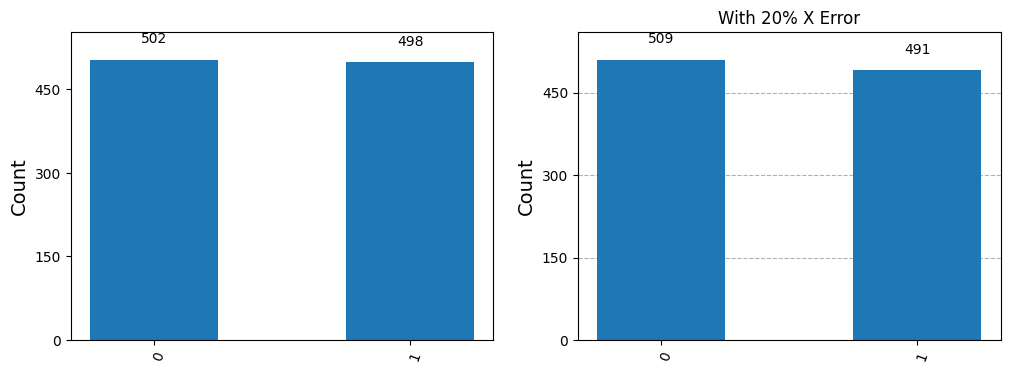

In [ ]:
# Install Qiskit if not already installed
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

# Imports
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import random
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

# Function to prepare Bell state and add optional error
def entanglement_test(apply_error=False):
    qc = QuantumCircuit(2, 1)

    # Step 1: Create Bell state: (|00> + |11>)/sqrt(2)
    qc.h(0)
    qc.cx(0, 1)

    # Step 2: With 20% chance, apply X gate (error) to qubit 0
    if apply_error and random.random() < 0.2:
        qc.x(0)

    # Step 3: Measure only the first qubit
    qc.measure(0, 0)

    return qc

# Simulate the circuit 1000 times
shots = 1000

# Without error (should be 50/50)
qc_no_error = entanglement_test(apply_error=False)
backend = AerSimulator()  # Use AerSimulator
#result_no_error = execute(qc_no_error, backend, shots=shots).result()
job_no_error = backend.run(qc_no_error, shots=shots)
result_no_error = job_no_error.result()
counts_no_error = result_no_error.get_counts()

# With error injected (entanglement may break)
qc_with_error = entanglement_test(apply_error=True)
result_with_error = backend.run(qc_with_error, shots=shots).result()
counts_with_error = result_with_error.get_counts()

# Plot results
print("Without Error (Entangled Bell State):", counts_no_error)
print("With Error (Entanglement Possibly Broken):", counts_with_error)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_histogram(counts_no_error, title="Without Error", ax=ax[0])
plot_histogram(counts_with_error, title="With 20% X Error", ax=ax[1])
plt.show()

In [ ]:
# Install Qiskit if needed
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

# Import modules
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

# Create a circuit that produces (|01> + |10>)/sqrt(2)
qc = QuantumCircuit(2, 2)

# Step-by-step:
qc.h(0)        # Put Qubit 0 into superposition
qc.cx(0, 1)    # Entangle with Qubit 1 (now in |00> + |11>)
qc.x(1)        # Flip Qubit 1 to turn |00>+|11> into |01>+|10>

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Simulate
backend = AerSimulator()
#result = execute(qc, backend, shots=1000).result() # Use backend.run() instead
job = backend.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Show result
print("Measurement Results (Opposite Entanglement):", counts)
plot_histogram(counts, title="Entangled State: (|01⟩ + |10⟩)/√2")
plt.show()

Measurement Results (Opposite Entanglement): {'10': 475, '01': 525}


In [ ]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

from qiskit import QuantumCircuit
import random
from qiskit_aer import AerSimulator

# Simulation parameters
shots = 500
bob_wins = 0
alice_wins = 0

simulator = AerSimulator()

for _ in range(shots):
    qc = QuantumCircuit(1, 1)

    # Alice prepares |+⟩
    qc.h(0)

    # Bob randomly chooses measurement basis
    basis = random.choice(['X', 'Z'])

    if basis == 'X':
        # Measure in X-basis: add Hadamard before measurement
        qc.h(0)
        qc.measure(0, 0)
        job = simulator.run(qc, shots=1)
        result = job.result()
        counts = result.get_counts()
        outcome = list(counts.keys())[0]
        if outcome == '0':  # |+⟩
            bob_wins += 1
        else:  # |−⟩
            alice_wins += 1

    elif basis == 'Z':
        # Measure in Z-basis
        qc.measure(0, 0)
        job = simulator.run(qc, shots=1)
        result = job.result()
        counts = result.get_counts()
        outcome = list(counts.keys())[0]
        if outcome == '0':  # |0⟩
            bob_wins += 1
        else:  # |1⟩
            alice_wins += 1

# Show results
print("📊 Classical Random Measurement")
print(f"Bob wins:   {bob_wins} ({bob_wins/shots*100:.1f}%)")
print(f"Alice wins: {alice_wins} ({alice_wins/shots*100:.1f}%)")

📊 Classical Random Measurement
Bob wins:   365 (73.0%)
Alice wins: 135 (27.0%)


# **Essay Question**

How Entanglement and Superposition Enable Quantum Speedups
Quantum computing gets its power from superposition and entanglement. These allow quantum systems to explore many solutions at once and create correlations that classical bits can't match. The tasks above demonstrate how these properties give quantum algorithms their advantage.

Superposition: Parallelism in a Single Qubit
A qubit can exist in a superposition like |+⟩ = (|0⟩ + |1⟩)/√2, holding both 0 and 1. In Task 1, Qubit 0 in superposition let us process both outcomes in parallel. This parallelism powers speedups in algorithms like Grover’s and Shor’s.

Entanglement: Correlations Beyond Classical Physics
Entanglement links qubits so that one’s state determines the other’s instantly. In Task 2, the Bell state (|00⟩ + |11⟩)/√2 showed perfect correlation without communication. This allows faster, non-local information processing across qubits.

Quantum vs Classical: Why the Difference?
Classical systems need to track every possible state separately — which grows exponentially. Quantum systems natively store all 2ⁿ possibilities with n qubits. This makes simulating quantum systems hard for classical computers.